In [5]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import json
import pandas as pd
import datetime as dt
import plotly

In [6]:
# select json to generate data from
data = "test_combined.json"

In [21]:
def create_df_all_models(data):

    with open(data) as f:
        data = json.load(f)
    


    #f = open("demofile.txt", "r")
    # generate variables to be added to the df
    vidlength = data['videoInfo']['videoLength']
    unique_keys = set([_key for key,val in data['seconds'].items() for _key, _val in val.items()])
    df = pd.DataFrame({'seconds': range(0, vidlength +1)})
    #df['seconds'] = pd.to_datetime(df["seconds"], unit='s').dt.strftime('%H:%M:%S')

    #add placeholder values
    for unique_key in unique_keys:
        df[unique_key] = 0
    
    #impute real values in their corresponding seconds
    
    for second, vals in data['seconds'].items():
        for _key, _val in vals.items():

            df.at[int(second), _key] = _val
    #df['seconds'] = pd.to_datetime(df['seconds'])
    
    # rename columns and clean names
    df.columns = map(str.title, df.columns)
    df.columns = df.columns.str.replace("_", " ")
    df = df.rename(columns={"Officer": "Uniformed Person", "Civilian": "Non-Uniformed Person"})
    # reorder columns
    #df = df[['seconds', 'Officer', 'Civilian', 'Chemical Smoke', 'Riot Shield', 'Baton', '']]
    print(df.columns)
    return df

df = create_df_all_models(data)

color_map = {'Brawling':'red', 'Restraining':'red', 'Striking':'red','Throwing': 'red', 'Brawling':'red', 'Running':'yellow', 'Chemical Smoke':'green', 'Crowd':'yellow',
       'Baton':'green', 'Riot Shield':'green', 'Non-Uniformed Person':'purple', 'Uniformed Person':'purple',
       'Person On Ground':'yellow', 'Spray':'red', 'Gun':'red', 'Pepper Spray':'green'}

Index(['Seconds', 'Throwing', 'Person On Ground', 'Baton', 'Running',
       'Chemical Smoke', 'Brawling', 'Uniformed Person', 'Crowd',
       'Non-Uniformed Person', 'Riot Shield', 'Spray'],
      dtype='object')


In [22]:
df

,Seconds,Throwing,Person On Ground,Baton,Running,Chemical Smoke,Brawling,Uniformed Person,Crowd,Non-Uniformed Person,Riot Shield,Spray
0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,4,0,9,0,0
2,2,1,0,0,0,0,0,0,0,2,0,0
3,3,1,0,0,0,0,0,0,0,7,0,0
4,4,1,0,0,0,0,0,1,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,0,0,0,0,0,0,5,0,0,0,0
137,137,0,0,0,0,0,0,5,0,3,0,0
138,138,0,0,0,0,0,0,4,0,6,1,0
139,139,0,0,0,0,0,0,5,0,4,0,0


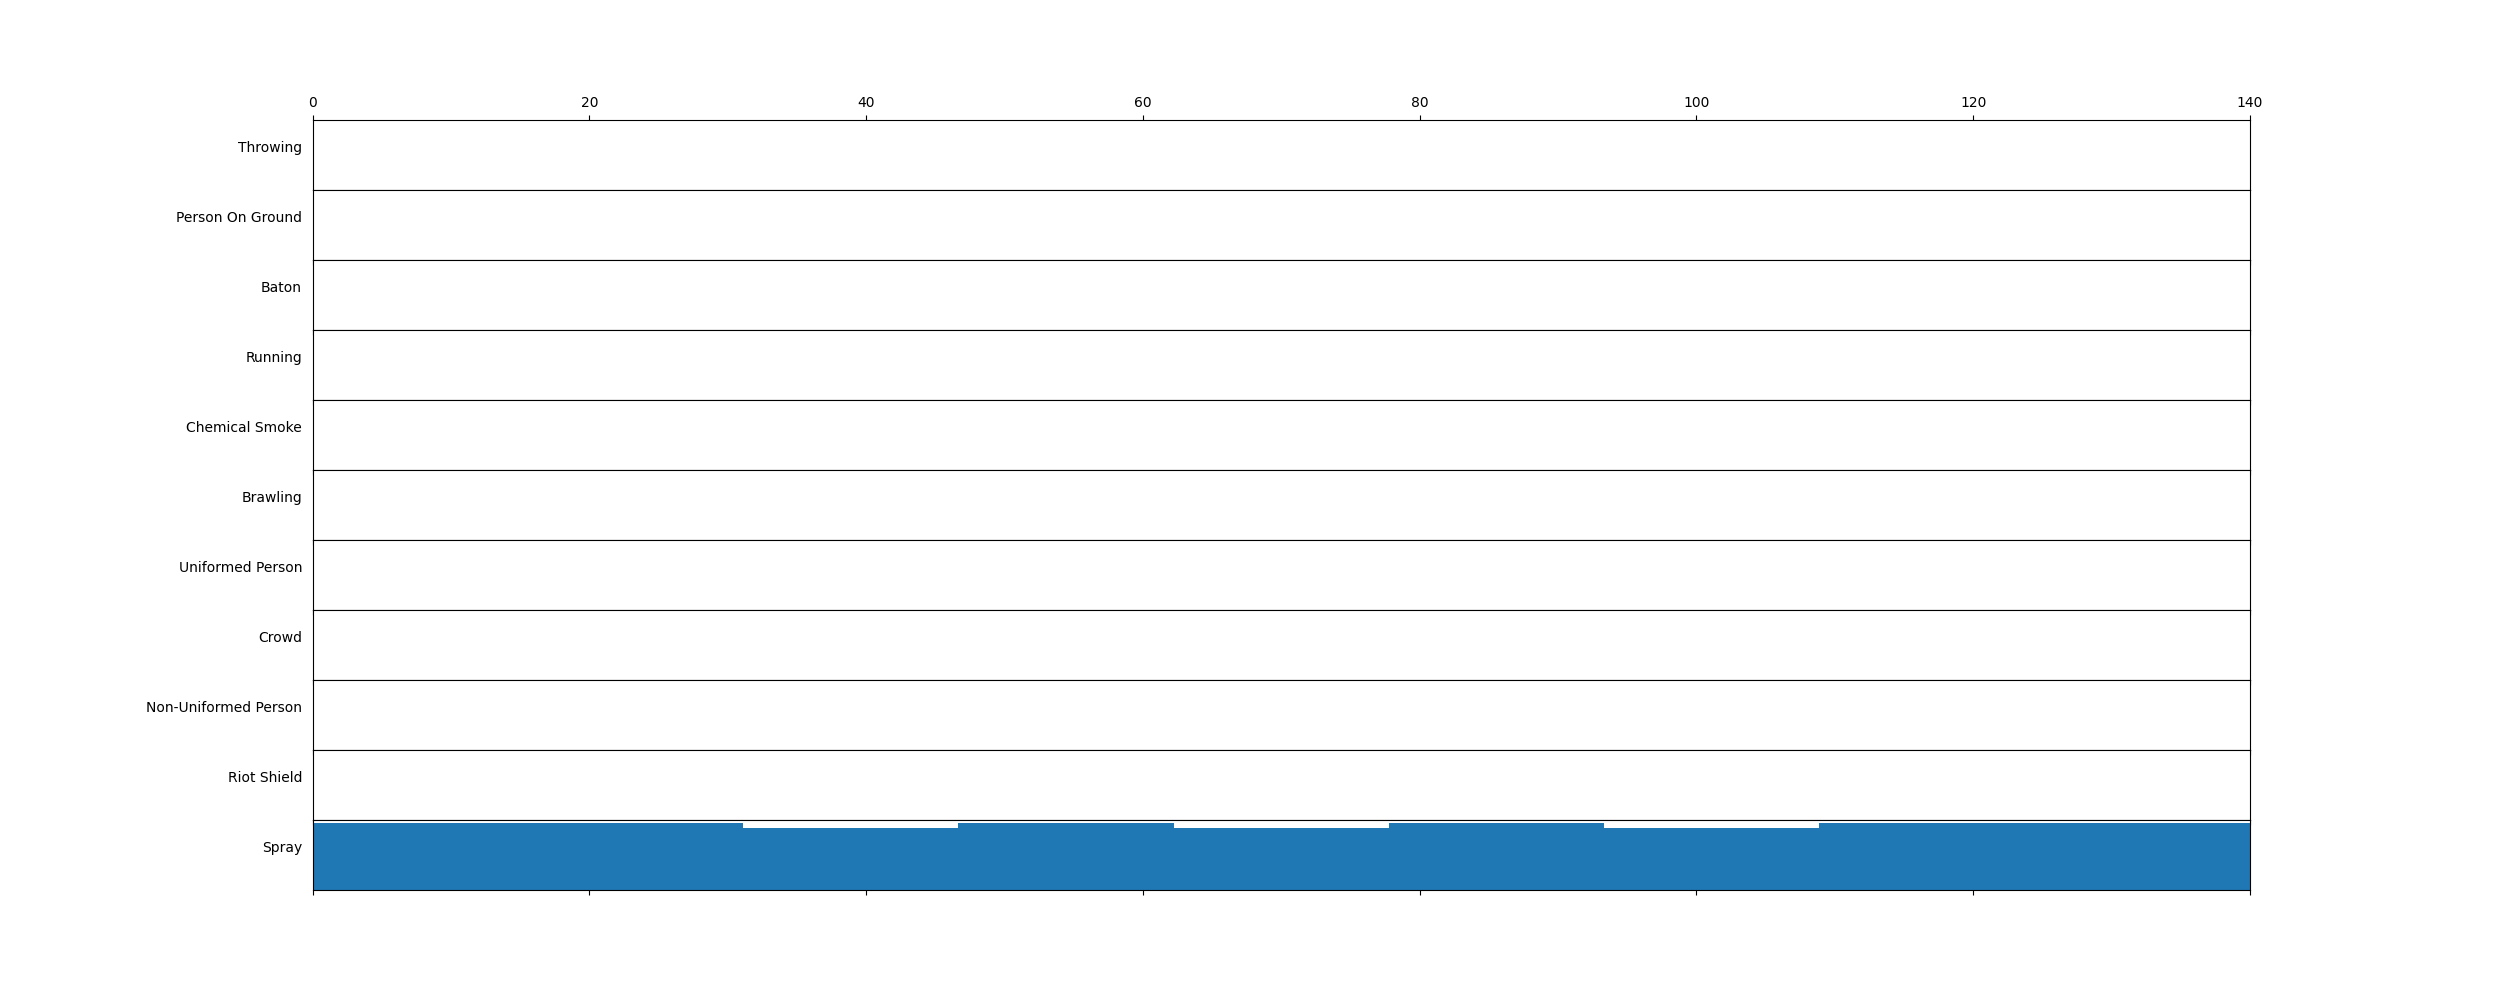

In [9]:
# matplotlib
%matplotlib ipympl
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import Slider
from mpl_interactions import interactive_hist
import numpy as np

df_col_names = list(df.columns[1:])

fig, axs = plt.subplots(len(df.columns)- 1, 1, figsize=(25,10))

def draw_graph():
    for ind, ax in enumerate(axs):
        #color
        col_name = df.columns[ind + 1]


        ax.hist(x=df['Seconds'],bins=200, weights=df[df_col_names[ind]], color=color_map[col_name])
        ax.hist(x=df['Seconds'],bins=200, weights=df[df_col_names[ind]] * -1, color=color_map[col_name])
        ax.set_ylabel(df_col_names[ind], rotation=0, ha='right')

        ax.margins(x=0)
        ax.axes.yaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticks([])
        if ind == 0:
            ax.xaxis.tick_top()
        else:
            ax.axes.xaxis.set_ticklabels([])
            
        #controls = interactive_hist(arr=df['Seconds'],bins=200, weights=df[df_col_names[ind]], color=color_map[col_name], scale=(0, 1))
        controls = interactive_hist(arr=df['Seconds'].to_numpy(), scale=(0, 1))
        
plt.subplots_adjust(wspace=0, hspace=0)

draw_graph()

# SLIDER




"""
ax_slide=plt.axes([.25,.1,.65,.03])
s_factor=Slider(ax_slide,"changing value",valmin=0,valmax=1.0,valinit=.5,valstep=0.01)

def update(val):
    pass
 
s_factor.on_changed(update)
"""
plt.show()


In [109]:
import altair as alt

interval = alt.selection_interval(encodings=['x'])

base = alt.Chart(df).properties(    
    width=800,
    height=50
)


chart = base.mark_bar().encode(
    alt.X('Seconds', bin=alt.Bin(maxbins=10, extent=interval), scale=alt.Scale(domain=interval.ref())),
    alt.Y(alt.repeat('row'), aggregate='sum')
).repeat(
    row=list(df.columns)[1:],
)


view = base.mark_bar().encode(
    alt.X('Seconds')
).add_selection(
    interval
).properties(
    width=800,
    height=50,
)





view & chart 

alt.VConcatChart(...)

In [53]:
# fig 2 with histogram
#keep track of detection colors
bins = 200

#detection_colors = {'Officer': 'blue', 'Civilian': 'blue', 'Baton': 'green', 'Gun':'green', 'Riot Shield': 'green', 'Chemical Smoke': 'red', 'Pepper Spray': 'red'}

x = df['seconds']
y = df['Officer']

fig = make_subplots(
    rows=len(df.columns)-1, 
    cols=1,
    shared_xaxes=True,
    subplot_titles=df.columns[1:],
    vertical_spacing=0,
    column_widths=[1],
    
    )

# add the bars into the graph
for i, val in enumerate(df.columns):
    if val == 'seconds':
        continue
    fig.add_trace(
        go.Histogram(
        x=df['seconds'],
        y=df[val],
        histfunc='sum',
        marker=dict(color='blue'),
        #marker=dict(color=detection_colors[val]),
        nbinsx=bins
    ),row=i, col=1),
    # add negative of same values to flip the bars on the same graph
    fig.add_trace(
        go.Histogram(
        x=df['seconds'],
        y=df[val] * -1,
        histfunc='sum',
        nbinsx=bins,
        marker=dict(color='blue')
        #marker=dict(color=detection_colors[val]),
        
    ),row=i, col=1)

fig.update_layout(
    showlegend=False,
    height = 400,
    width = 1500,
    barmode='relative',
    bargap=0,
    bargroupgap=0,
    margin=dict(
    l=150,
    r=10,
    b=20,
    t=30,
    pad=0
    ),
    )

for i in range(1, len(df.columns)):
    fig.update_yaxes(
    row=i, col=1, side='left', showticklabels=False, showgrid=False, linewidth=1, linecolor='black', mirror=True,)

    if i == 1:
        fig.update_xaxes(row=i, col=1, side='top',linewidth=1, linecolor='gray', mirror=True,showticklabels=True, nticks=12)
    else:
        fig.update_xaxes(row=i, col=1, showticklabels=False, linewidth=1, linecolor='gray', mirror=True)

for i in range(0, len(df.columns[1:])):
    fig.layout.annotations[i].update(x=-0.06)
    fig.layout.annotations[i]['y'] = fig.layout.annotations[i]['y'] - 0.08

fig.show()